In [86]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = sns.load_dataset("tips")


In [87]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [88]:
brak = df.isnull().sum()
print(brak)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


brak brakujacych wartosci

srednia wartosc rachunku + tips + podzial 

In [89]:
srednia = df.groupby(['day', 'sex']).agg({'total_bill': 'mean', 'tip': 'mean'})
print(srednia)

             total_bill       tip
day  sex                         
Thur Male     18.714667  2.980333
     Female   16.715312  2.575625
Fri  Male     19.857000  2.693000
     Female   14.145556  2.781111
Sat  Male     20.802542  3.083898
     Female   19.680357  2.801786
Sun  Male     21.887241  3.220345
     Female   19.872222  3.367222


C:\Users\Kamil\AppData\Local\Temp\ipykernel_9480\41598621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  srednia = df.groupby(['day', 'sex']).agg({'total_bill': 'mean', 'tip': 'mean'})


srednia wartosc rachunku z podzialem groupby + agg

In [104]:
df["tip_rate"] = df["tip"] / df["total_bill"]
print(df["tip_rate"])

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64


srednia dla danego dnia

In [116]:
procent = df.groupby('day')['tip'].mean()
print(procent)

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


C:\Users\Kamil\AppData\Local\Temp\ipykernel_9480\22015977.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  procent = df.groupby('day')['tip'].mean()


<Axes: xlabel='total_bill', ylabel='tip_rate'>

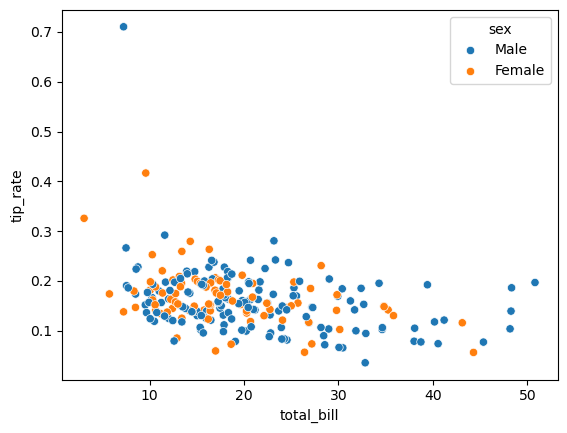

In [113]:
sns.scatterplot(data=df, x=df["total_bill"], y=df["tip_rate"], hue=df["sex"])

Poziom napiwkow jest troche wiekszy w weekendy.
Wieksze napiwki zostawiaja kobiety